# **Q 3.1**

Import the file 'gold.csv' (you will find this in the intro section to download or in '/Data/gold.csv' if you are using the jupyter notebook), which contains the data of the last 2 years price action of Indian (MCX) gold standard. Explore the dataframe. You'd see 2 unique columns - 'Pred' and 'new'. One of the 2 columns is a linear combination of the OHLC prices with varying coefficients while the other is a polynomial function of the same inputs. Also, one of the 2 columns is partially filled. Using linear regression, find the coefficients of the inputs and using the same trained model, complete the entire column. Also, try to fit the other column as well using a new linear regression model. Check if the predictions are accurate. Mention which column is a linear function and which is polynomial. (Hint: Plotting a histogram & distplot helps in recognizing the discrepencies in prediction, if any.)

**Importing required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Gold dataset**

In [0]:
data=pd.read_csv('/content/drive/My Drive/internship/GOLD.csv')

In [3]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [4]:
data.isnull().sum()

Date          0
Price         0
Open          0
High          0
Low           0
Vol.          0
Change %      0
Pred        101
new           0
dtype: int64

In [5]:
data.shape

(512, 9)

In [0]:
data.set_index('Date', inplace=True )

In [7]:
data

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...
"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,NaN,247.177322
"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,NaN,52.201158
"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,NaN,113.293305


In [0]:
#x=data.iloc[:,0:4]
#x=pd.DataFrame(data=data,columns=['Open','High','Low','Price'])
#y=data.iloc[:,-2]
#y2 = pd.DataFrame(data=data,columns=['Pred','New'])

In [0]:
X_fields = ['Price','Open','High','Low']
Y_field  = 'Pred'

**Separating Nan vales and splitting the dataset into train data and test data**

In [0]:
train_data   = data[ -np.isnan(data['Pred'])] 
test_data    = data[  np.isnan(data['Pred'])]

In [11]:
print(train_data.tail())
print(test_data.head())

              Price   Open   High    Low    Vol. Change %   Pred         new
Date                                                                        
Dec 04, 2018  30964  30874  31085  30874   0.08K    0.57%  -31.0  301.615081
Dec 05, 2018  30926  30830  30970  30825   0.04K   -0.12%   72.0  241.475101
Dec 06, 2018  31005  31039  31196  30974  10.55K    0.26%   35.0  188.222186
Dec 07, 2018  31440  31011  31480  30941  11.24K    1.40%  669.0  976.692705
Dec 10, 2018  31895  31459  31966  31420  14.09K    1.45%  521.0  990.254297
              Price   Open   High    Low    Vol. Change %  Pred         new
Date                                                                       
Dec 11, 2018  31812  31850  31850  31618  10.53K   -0.26%   NaN  195.423493
Dec 12, 2018  31626  31749  31749  31582   7.57K   -0.58%   NaN   44.232664
Dec 13, 2018  31414  31550  31600  31337   8.43K   -0.67%   NaN  127.646233
Dec 14, 2018  31437  31440  31514  31384   6.75K    0.07%   NaN  127.219539
Dec 1

**Now all the Nan values are separted**

In [0]:
pred_model = LinearRegression().fit( train_data[ X_fields ], train_data['Pred'] ) #fitting the model

In [13]:
pred_model.score( train_data[ X_fields ], train_data['Pred'] )

1.0

In [14]:
print('Prediction values of Pred :',pred_model.predict(train_data[X_fields]))
print('Original Pred values: ',train_data['Pred'])

Prediction values of Pred : [ 738. -146.   30.  357.  124.  149.  167.   22.   34.  420.  234.  345.
  265.  138.  378.  413.  214.  121.  491.  397.  404.  222.   -3.  259.
  344.  906.  526.  174.  685.  329.  592.  205.  292.  150.  420.  -42.
  -82.  262.   23.  173.  550.  928.  804.  -39.  927.  205.  771.  818.
  420.  142.  199.  432.   71.  101.  465.  350.  322.  121.  361.  436.
  202.  551.  224.  486.  247.  398.  316.  117.  333.  364.  242.  329.
  340.  804.  512.   -4.  230.  602.  129.  168. 1177.  333.   73.  740.
  286.   12. 1459. 1158.  258.  336.  238.  706.  339.  384.  374.  471.
  612.   45.   83.  548.   85.  620.  754.  409.  372.  483.  196.  554.
  318.  359.   82.   38.  147.   79.  393.  -13.  432.  333.   67.  164.
  498.  228.  574.  310.  238.  302.  811.  160.  397.  608.  208.  139.
  125.  377.  364.  222.  586.   68.  251.  569.  977.  365.  386.  183.
  247.  152.  220.  527.  850.   73.  101.  441.   67.  592.  476.  287.
  373.   79.   29.  165

**Prediction values and original values are same**

In [15]:
print('Coefficient:',pred_model.coef_)
print('Intercept:',pred_model.intercept_)

Coefficient: [ 2.  3. -1. -4.]
Intercept: -2.6716406864579767e-12


In [16]:
train_data['Pred_2'] = pred_model.predict( train_data[ X_fields ] )
test_data['Pred_2']  = test_data['Pred'] = pred_model.predict( test_data[  X_fields ] )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
test_data.head()

,Price,Open,High,Low,Vol.,Change %,Pred,new,Pred_2
Date,,,,,,,,,
"Dec 11, 2018",31812,31850,31850,31618,10.53K,-0.26%,852.0,195.423493,852.0
"Dec 12, 2018",31626,31749,31749,31582,7.57K,-0.58%,422.0,44.232664,422.0
"Dec 13, 2018",31414,31550,31600,31337,8.43K,-0.67%,530.0,127.646233,530.0
"Dec 14, 2018",31437,31440,31514,31384,6.75K,0.07%,144.0,127.219539,144.0
"Dec 17, 2018",31501,31369,31530,31291,5.97K,0.20%,415.0,372.603976,415.0


**Now all the Nan values are filled**

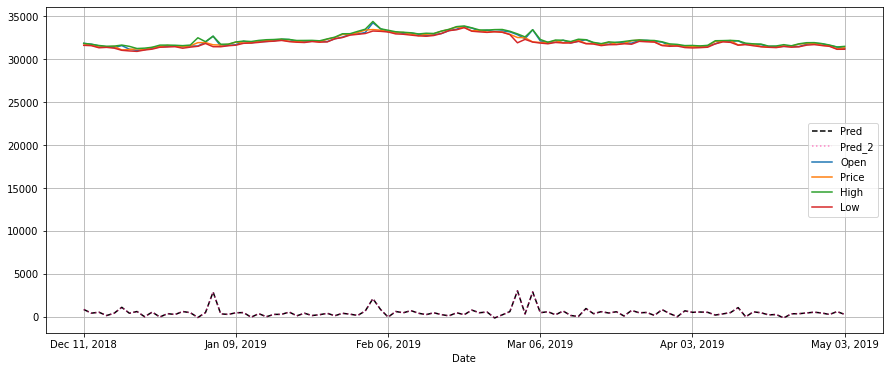

In [18]:
plt.figure(figsize = (15,6))
test_data['Pred'].plot(color = 'black',linestyle='--')
test_data['Pred_2'].plot(color = 'DeepPink', alpha = 0.5 ,linestyle=':')
test_data['Open'].plot()
test_data['Price'].plot()
test_data['High'].plot()
test_data['Low'].plot()
plt.grid()
plt.legend()
plt.show()

**Plotting histogram**

(array([20., 47., 24.,  6.,  0.,  0.,  0.,  1.,  0.,  3.]),
 array([-139. ,  177.3,  493.6,  809.9, 1126.2, 1442.5, 1758.8, 2075.1,
        2391.4, 2707.7, 3024. ]),
 <a list of 10 Patch objects>)

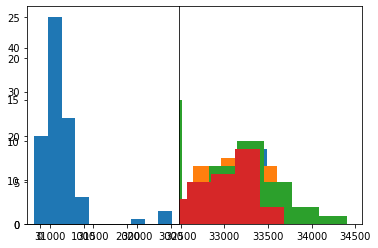

In [19]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax2 = fig.add_subplot(1, 2, 1)
ax1.hist( test_data['Price'] )
ax1.hist( test_data['Open'] )
ax1.hist( test_data['High'] )
ax1.hist( test_data['Low'] )
ax2.hist( test_data['Pred'] )

**Fitting the 'new' column with linear regression model**

In [20]:
new_model = LinearRegression().fit( train_data[ X_fields ],train_data['new'] )
new_model.score( test_data[ X_fields ], test_data['new'] )

0.9999683016109173

In [21]:
print('Coefficients:',new_model.coef_)
print('Intercept',new_model.intercept_)

Coefficients: [ 1.01202641 -1.00094252  1.00492221 -1.01604305]
Intercept -0.21616304410517273


**Now fitting the 'new' column with polynomial features**

In [0]:
features = {
    "train": PolynomialFeatures(2).fit_transform(train_data[ X_fields ] ),
    "test":  PolynomialFeatures(2).fit_transform( test_data[  X_fields ] ),    
}

In [0]:
new_model_poly = LinearRegression().fit( features['train'],train_data['new'] )

In [24]:
new_model_poly.score( features['test'],test_data['new'] )

0.9999998563364357

In [0]:
linear_new = new_model.predict(test_data[ X_fields ] )
poly_new = new_model_poly.predict( features['test'] )

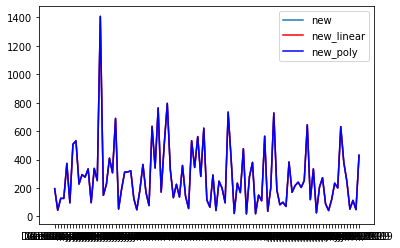

In [26]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot( test_data['new'],        label='new')
ax1.plot( linear_new, label='new_linear',color='r' ) 
ax1.plot( poly_new,label='new_poly',color='blue')  
ax1.legend()

**SInce 'Pred' using linear regression gives accurate prediction i.e 1.00 score -> so 'Pred' column is linear combination of OHLC**

**Fitting the 'New' column with linear regression -> 0.9999683016109173**
**and using Polynomial features -> 0.9999998563364357**
**So 'New' column is polynomial function of the inputs**

# **Q 3.2**

Import the stock of your choosing AND the Nifty index. Using linear regression (OLS), calculate - The daily Beta value for the past 3 months. (Daily= Daily returns) The monthly Beta value. (Monthly= Monthly returns) Refrain from using the (covariance(x,y)/variance(x)) formula. Attempt the question using regression.(Regression Reference) Were the Beta values more or less than 1 ? What if it was negative ? Discuss. Include a brief writeup in the bottom of your jupyter notebook with your inferences from the Beta values and regression results

**If a stock is riskier than the market, it will have a beta greater than one. If a stock has a beta of less than one,the formula assumes it will reduce the risk of a portfolio**

In [0]:
infy=pd.read_csv('/content/drive/My Drive/internship/INFY.csv',parse_dates=['Date'], index_col='Date') 
nifty=pd.read_csv('/content/drive/My Drive/internship/Nifty50.csv',parse_dates=['Date'], index_col='Date')

In [28]:
infy.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,INFY,EQ,964.25,963.5,963.50,949.10,953.25,951.55,951.49,3648582,3.471580e+09,75335,3052819,83.67
2017-05-16,INFY,EQ,951.55,953.1,960.15,946.95,956.00,955.00,952.92,3065084,2.920775e+09,71808,1858063,60.62
2017-05-17,INFY,EQ,955.00,951.6,958.45,943.85,952.90,952.80,949.48,1457754,1.384110e+09,75429,792251,54.35
2017-05-18,INFY,EQ,952.80,943.0,973.90,942.85,960.25,961.75,962.61,4028924,3.878282e+09,120990,2309450,57.32
2017-05-19,INFY,EQ,961.75,961.5,962.70,947.85,957.40,957.95,954.18,2128698,2.031155e+09,88897,1457747,68.48


In [29]:
nifty.head()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Date,,,,,,
2017-05-15,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
2017-05-16,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2017-05-17,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
2017-05-18,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
2017-05-19,9469.90,9505.75,9390.75,9427.90,259861396,11544.77


In [0]:
infy=infy[infy.Series=='EQ']

In [31]:
df = pd.concat([infy['Close Price'],nifty['Close'] ], axis=1)
df.columns = ['infy', 'nifty']
df.head()

,infy,nifty
Date,,
2017-05-15,951.55,9445.40
2017-05-16,955.00,9512.25
2017-05-17,952.80,9525.75
2017-05-18,961.75,9429.45
2017-05-19,957.95,9427.90


In [0]:
returns = df.pct_change().dropna(axis=0)

In [33]:
returns.head()

,infy,nifty
Date,,
2017-05-16,0.003626,0.007078
2017-05-17,-0.002304,0.001419
2017-05-18,0.009393,-0.010109
2017-05-19,-0.003951,-0.000164
2017-05-22,0.003654,0.001098


In [34]:
inf = returns['infy']
Ni  = returns['nifty']
N1 = sm.add_constant(Ni)

model = OLS(inf,N1 )
res=model.fit()
print(res.summary())
print('Daily beta value:',res.params.nifty)

                            OLS Regression Results                            
Dep. Variable:                   infy   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     21.20
Date:                Fri, 15 May 2020   Prob (F-statistic):           5.28e-06
Time:                        04:30:25   Log-Likelihood:                 1103.2
No. Observations:                 493   AIC:                            -2202.
Df Residuals:                     491   BIC:                            -2194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.001     -0.312      0.7

**The daily Beta value is 0.74 means it is assume to be less volatile than the market ,or has a fewer price swings.So the stock is considered less risky**

In [0]:
infy['month']    =infy.index.map(   lambda date: f"{date.year}-{date.month}")
nifty['month'] = nifty.index.map(lambda date: f"{date.year}-{date.month}")

In [36]:
 infy_monthly   =infy.groupby('month').last()
nifty_monthly =nifty.groupby('month').last()
infy_monthly.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
month,,,,,,,,,,,,,,
2017-10,INFY,EQ,944.10,925.00,930.00,920.00,922.00,921.85,924.74,4977494,4.602897e+09,68301,3547519,71.27
2017-11,INFY,EQ,982.70,989.45,989.45,968.35,972.50,976.10,978.17,8633472,8.445011e+09,126288,5893906,68.27
2017-12,INFY,EQ,1033.25,1030.10,1048.80,1030.00,1041.25,1042.05,1041.38,3300884,3.437462e+09,83693,2238793,67.82
2017-5,INFY,EQ,996.20,993.55,993.55,974.85,976.05,977.05,980.19,3881950,3.805051e+09,121323,3086038,79.50
2017-6,INFY,EQ,930.20,930.80,938.00,929.00,934.40,935.55,934.42,2108350,1.970090e+09,64325,1526984,72.43


In [37]:
returns_monthly = pd.concat([ infy_monthly['Close Price'],nifty_monthly['Close'] ], axis=1).pct_change().dropna()
returns_monthly.columns = ['infy', 'nifty']
returns_monthly.head()

,infy,nifty
month,,
2017-11,0.058849,-0.010522
2017-12,0.067565,0.029741
2017-5,-0.062377,-0.086362
2017-6,-0.042475,-0.010430
2017-7,0.080862,0.058419


In [38]:
A  = returns_monthly['infy']
B = returns_monthly['nifty']
B1 = sm.add_constant(B)

model = OLS( A,B1 )
res2=model.fit()
print(res2.summary())
print('Monthly beta value:',res2.params.nifty)

                            OLS Regression Results                            
Dep. Variable:                   infy   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     2.906
Date:                Fri, 15 May 2020   Prob (F-statistic):              0.102
Time:                        04:30:25   Log-Likelihood:                 4.0508
No. Observations:                  24   AIC:                            -4.102
Df Residuals:                      22   BIC:                            -1.745
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0064      0.044      0.146      0.8

**The daily Beta value is 1.52 means it is assume to be 52% more volatile than the maret**

**Brief Writeup:**
Beta value greater than 1 denotes a volatility that is greater than the broad-based index.

A negative beta correlation means an investment moves in the opposite direction from the stock market.When the market rises, a negative-beta investment generally falls. When the market falls, the negative-beta investment will tend to rise.